# Solution to Exercise 1
> Authors: Linus Baumgartner, Linus Keiser, Malte Maas

In [1]:
# 1 - Implementation of the recursive factorial algorithm from wikipedia
def fac(n: int) -> int:
    """
    Calculates the factorial of a non-negative integer `n`.
    """
    if n < 0:
        raise ValueError("n must be non-negative")

    if n == 0: # by convention, 0! is 1.
        return 1
    else:
        return n * fac(n - 1)


print(fac(4))
print(fac(5))
print(fac(25))

24
120
15511210043330985984000000


We implement the sum $sin(x, {lim}) = \sum_0^{lim} (-1)^n \frac{x^{2n+1}}{(2n+1)!}$ by using Pythons builtin `sum` function along with a generator expression which calculates the term for a given $n$ in range $0 \ldots lim$.

In [2]:
# 2 - Implementation of the sum representation of sin(x)
def sin_approx(x: float, lim: int = 10) -> float:
    """
    Approximates sin(x) by calculating the sum representation of sin up to the given limit.
    """
    return sum(
        (-1) ** n * x ** (2 * n + 1) / fac(2 * n + 1) for n in range(0, lim)
    )

print(sin_approx(1))
print(sin_approx(0))

0.8414709848078965
0.0


In [3]:
# 3 - Testing out math.sin
import math

print(f"sin(pi) = {round(math.sin(math.pi))}")
print(f"sin(pi / 2) = {math.sin(math.pi / 2)}")

x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

sin_values = [math.sin(x) for x in x_values]

for x, y in zip(x_values, sin_values):
    print(f"sin({x}): {y:.4f}")

sin(pi) = 0
sin(pi / 2) = 1.0
sin(1): 0.8415
sin(2): 0.9093
sin(3): 0.1411
sin(4): -0.7568
sin(5): -0.9589
sin(6): -0.2794
sin(7): 0.6570
sin(8): 0.9894
sin(9): 0.4121
sin(10): -0.5440


In [20]:
# 4 - Comparison of math.sin with our approximation
# Sample Input values
x_values = [i for i in range (100)]

# We compare sin and sin_approx for different term limits
for limit in [1, 2, 3, 5, 7, 12, 19]:
    print(f"\nComparison with limit = {limit}")
    errors = []
    for x in x_values:
        approx_value = sin_approx(x, limit)
        reference_value = math.sin(x)
        error = abs(approx_value - reference_value)
        errors.append(error)
    print(f"Avg error: {sum(errors) / len(errors)}, Max: {max(errors)}")


Comparison with limit = 1
Avg error: 49.496208053725496, Max: 99.99920683418635

Comparison with limit = 2
Avg error: 40788.00379194627, Max: 161616.50079316582

Comparison with limit = 3
Avg error: 13434906.371208053, Max: 79087554.32420684

Comparison with limit = 5
Avg error: 259632518409.18036, Max: 2498994368029.1655

Comparison with limit = 7
Avg error: 1049131207640645.1, Max: 1.3870346460567788e+16

Comparison with limit = 12
Avg error: 1.3497876627728888e+22, Max: 2.9179086198927716e+23

Comparison with limit = 19
Avg error: 1.3732963718141081e+29, Max: 4.402927125734025e+30


It becomes apparent that using a higher limit in the calculation leads to more accurate results. There seems to be a point of diminishing returns, however: while calculating our approximation with a limit smaller than 12 seems to be wildly inaccurate in our chosen range of values, increasing the limit further only yields marginal improvements.

In [5]:
# 5 - We generate values in the range [0 to 10), spaced in increments of 0.01, using a list comprehension.
x = [i * 0.01 for i in range(1000)]

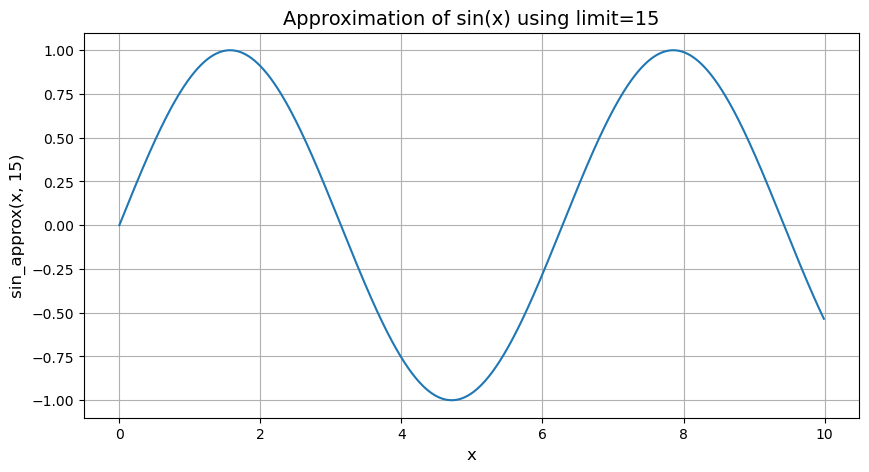

In [11]:
import matplotlib.pyplot as plt

# 6 - We then apply our sin_approx function to each value in the list, storing the resulting list in `y`.T
# The limit of 15 is arbitrary, but we know from previous observations that the results should be somewhat close
# to the reference `sin` function from the math module.
lim = 15
y = [sin_approx(x, lim) for x in x]

# 7 - Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel("x", fontsize=12)
plt.ylabel(f"sin_approx(x, {lim})", fontsize=12)
plt.title(f"Approximation of sin(x) using limit={lim}", fontsize=14)
plt.grid(True)
plt.show()

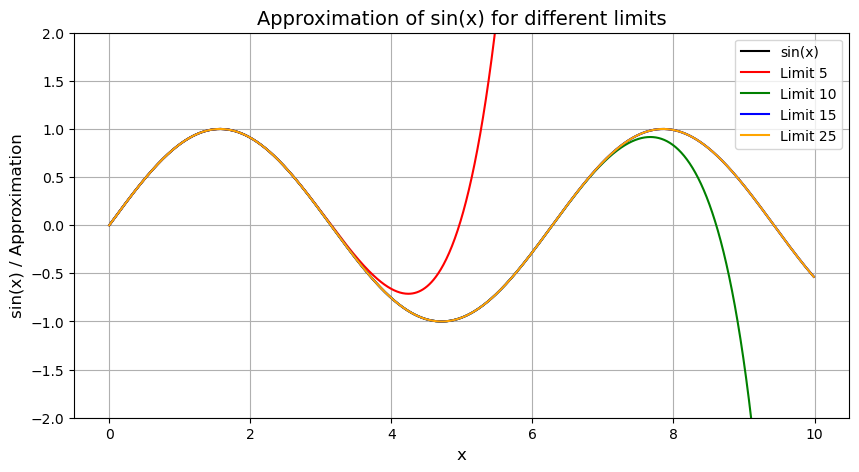

In [13]:
# 8 - Plotting for different limits and comparison
limits = [5, 10, 15, 25]  # Limits to compare
colors = ['red', 'green', 'blue', 'orange']

plt.figure(figsize=(10, 5))
plt.plot(x, [math.sin(i) for i in x], label="sin(x)", color='black')  # Reference sin(x)

for lim, col in zip(limits, colors):
    y_approx = [sin_approx(i, lim) for i in x]
    plt.plot(x, y_approx, label=f"Limit {lim}", color=col)

plt.ylim([-2, 2]) # We need to limit the y-range on the plot, since low limit values produce very large values, distorting the scale
plt.xlabel("x", fontsize=12)
plt.ylabel("sin(x) / Approximation", fontsize=12)
plt.title("Approximation of sin(x) for different limits", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

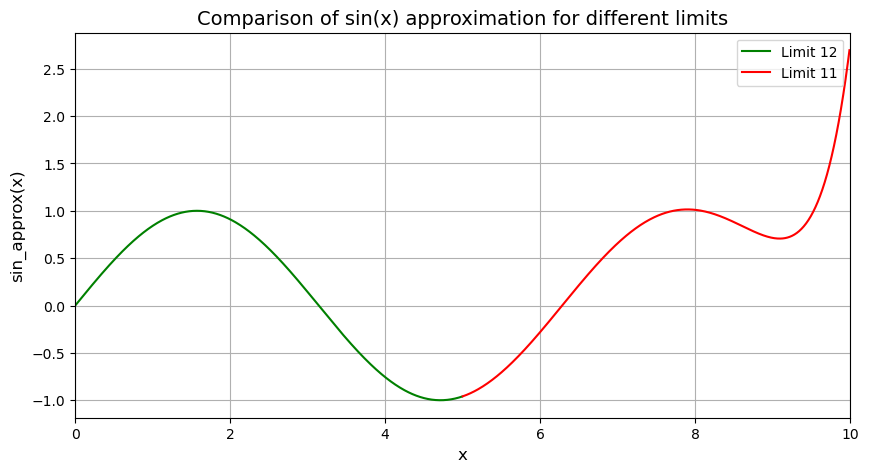

In [17]:
# 9 - Comparing two limits in different ranges
lim1, lim2 = 12, 11

x1 = x[:len(x) // 2 ]  # Range [0 to 5)
x2 = x[len(x) // 2:]  # Range [5,10)

y1 = [sin_approx(i, lim1) for i in x1]
y2 = [sin_approx(i, lim2) for i in x2]

plt.figure(figsize=(10, 5))
plt.plot(x1, y1, label=f"Limit {lim1}", color='green')
plt.plot(x2, y2, label=f"Limit {lim2}", color='red')
plt.xlabel("x", fontsize=12)
plt.ylabel("sin_approx(x)", fontsize=12)
plt.title("Comparison of sin(x) approximation for different limits", fontsize=14)
plt.xlim([0, 10])
plt.legend()
plt.grid(True)
plt.show()